## Set torch.device to CUDA

In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


## Download NLTK

In [2]:
import nltk
import os
CUSTOM_DIR = './nltk_data/'

nltk.data.path.append(CUSTOM_DIR)

resources = [
    ('reuters.zip', os.path.join(CUSTOM_DIR, 'corpora', 'reuters')),
    ('punkt.zip', os.path.join(CUSTOM_DIR, 'tokenizers', 'punkt')),
    ('punkt_tab.zip', os.path.join(CUSTOM_DIR, 'tokenizers', 'punkt_tab')),
    ('stopwords.zip', os.path.join(CUSTOM_DIR, 'corpora', 'stopwords')),
]

for resource, path in resources:
    try:
        nltk.data.find(resource)
    except LookupError:
        if not os.path.exists(path):
            nltk.download(resource.split('.')[0], download_dir=CUSTOM_DIR)


[nltk_data] Downloading package reuters to ./nltk_data/...
[nltk_data]   Package reuters is already up-to-date!


In [3]:
from nltk.corpus import reuters

category = "trade"
category_fileids = reuters.fileids(category)
category_docs = [reuters.raw(fileids) for fileids in category_fileids]

print(f"# of documents in category '{category}': {len(category_docs)}")
print(f"1st document:\n{category_docs[0][:500]}")

# of documents in category 'trade': 485
1st document:
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict wo


In [4]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

In [5]:
preprocessed_docs = [preprocess_text(doc) for doc in category_docs]
preprocessed_docs

[['asian',
  'exporters',
  'fear',
  'damage',
  'u.s.-japan',
  'rift',
  'mounting',
  'trade',
  'friction',
  'u.s.',
  'japan',
  'raised',
  'fears',
  'among',
  'many',
  'asia',
  "'s",
  'exporting',
  'nations',
  'row',
  'could',
  'inflict',
  'far-reaching',
  'economic',
  'damage',
  'businessmen',
  'officials',
  'said',
  'told',
  'reuter',
  'correspondents',
  'asian',
  'capitals',
  'u.s.',
  'move',
  'japan',
  'might',
  'boost',
  'protectionist',
  'sentiment',
  'u.s.',
  'lead',
  'curbs',
  'american',
  'imports',
  'products',
  'exporters',
  'said',
  'conflict',
  'would',
  'hurt',
  'long-run',
  'short-term',
  'tokyo',
  "'s",
  'loss',
  'might',
  'gain',
  'u.s.',
  'said',
  'impose',
  '300',
  'mln',
  'dlrs',
  'tariffs',
  'imports',
  'japanese',
  'electronics',
  'goods',
  'april',
  '17',
  'retaliation',
  'japan',
  "'s",
  'alleged',
  'failure',
  'stick',
  'pact',
  'sell',
  'semiconductors',
  'world',
  'markets',
  'cost

In [6]:
len(preprocessed_docs)

485

In [7]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(preprocessed_docs)))
vocab

['happen',
 'newly',
 'reflate',
 'inflationary',
 'grants',
 'semiconductor',
 'civilian',
 'consistent',
 '300,000',
 '9.45',
 'internal',
 'negatively',
 'outraged',
 'repay',
 'presidents',
 'hidden',
 'prudence',
 'avowed',
 'europe',
 'ongoing',
 'cap',
 'knock-down',
 'andre',
 '580',
 'oslo',
 'evening',
 '76.78',
 'motor',
 'james',
 'hope',
 'curbs',
 '1.29',
 '8.667',
 'spent',
 'comoros',
 'prominence',
 'demand',
 'asian',
 'thai',
 'hitachi',
 'lack',
 'slumps',
 'buyers',
 'write',
 'pounds',
 'artificial',
 '24.4',
 'reached',
 'furious',
 'spill',
 '147.5',
 'wish',
 'letting',
 '598',
 'tighten',
 'prohibited',
 'minister',
 '165.7',
 'throughout',
 'measured',
 'saved',
 '7.7',
 'steer',
 'commit',
 'gradin',
 'debt',
 'million',
 'feels',
 'jobless',
 'user',
 'keep',
 '35.1',
 'things',
 'attache',
 'pledges',
 'conciliatory',
 'senators',
 'account',
 'polish',
 'seven-nation',
 'wil',
 'reimpose',
 'faster',
 '37.15',
 'application',
 'rises',
 'gsp',
 'participa

In [8]:
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'happen': 0, 'newly': 1, 'reflate': 2, 'inflationary': 3, 'grants': 4, 'semiconductor': 5, 'civilian': 6, 'consistent': 7, '300,000': 8, '9.45': 9, 'internal': 10, 'negatively': 11, 'outraged': 12, 'repay': 13, 'presidents': 14, 'hidden': 15, 'prudence': 16, 'avowed': 17, 'europe': 18, 'ongoing': 19, 'cap': 20, 'knock-down': 21, 'andre': 22, '580': 23, 'oslo': 24, 'evening': 25, '76.78': 26, 'motor': 27, 'james': 28, 'hope': 29, 'curbs': 30, '1.29': 31, '8.667': 32, 'spent': 33, 'comoros': 34, 'prominence': 35, 'demand': 36, 'asian': 37, 'thai': 38, 'hitachi': 39, 'lack': 40, 'slumps': 41, 'buyers': 42, 'write': 43, 'pounds': 44, 'artificial': 45, '24.4': 46, 'reached': 47, 'furious': 48, 'spill': 49, '147.5': 50, 'wish': 51, 'letting': 52, '598': 53, 'tighten': 54, 'prohibited': 55, 'minister': 56, '165.7': 57, 'throughout': 58, 'measured': 59, 'saved': 60, '7.7': 61, 'steer': 62, 'commit': 63, 'gradin': 64, 'debt': 65, 'million': 66, 'feels': 67, 'jobless': 68, 'user': 69, 'keep': 7

In [9]:
voc_size = len(vocab)
print(voc_size)

8163


In [10]:
index2word = {v:k for k, v in word2index.items()} 
index2word

{0: 'happen',
 1: 'newly',
 2: 'reflate',
 3: 'inflationary',
 4: 'grants',
 5: 'semiconductor',
 6: 'civilian',
 7: 'consistent',
 8: '300,000',
 9: '9.45',
 10: 'internal',
 11: 'negatively',
 12: 'outraged',
 13: 'repay',
 14: 'presidents',
 15: 'hidden',
 16: 'prudence',
 17: 'avowed',
 18: 'europe',
 19: 'ongoing',
 20: 'cap',
 21: 'knock-down',
 22: 'andre',
 23: '580',
 24: 'oslo',
 25: 'evening',
 26: '76.78',
 27: 'motor',
 28: 'james',
 29: 'hope',
 30: 'curbs',
 31: '1.29',
 32: '8.667',
 33: 'spent',
 34: 'comoros',
 35: 'prominence',
 36: 'demand',
 37: 'asian',
 38: 'thai',
 39: 'hitachi',
 40: 'lack',
 41: 'slumps',
 42: 'buyers',
 43: 'write',
 44: 'pounds',
 45: 'artificial',
 46: '24.4',
 47: 'reached',
 48: 'furious',
 49: 'spill',
 50: '147.5',
 51: 'wish',
 52: 'letting',
 53: '598',
 54: 'tighten',
 55: 'prohibited',
 56: 'minister',
 57: '165.7',
 58: 'throughout',
 59: 'measured',
 60: 'saved',
 61: '7.7',
 62: 'steer',
 63: 'commit',
 64: 'gradin',
 65: 'debt',

## Prepare train data

In [11]:
total_count = 0
for count, value in enumerate(preprocessed_docs):
    total_count += count
    print(value)

print(total_count)

['asian', 'exporters', 'fear', 'damage', 'u.s.-japan', 'rift', 'mounting', 'trade', 'friction', 'u.s.', 'japan', 'raised', 'fears', 'among', 'many', 'asia', "'s", 'exporting', 'nations', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', 'businessmen', 'officials', 'said', 'told', 'reuter', 'correspondents', 'asian', 'capitals', 'u.s.', 'move', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'u.s.', 'lead', 'curbs', 'american', 'imports', 'products', 'exporters', 'said', 'conflict', 'would', 'hurt', 'long-run', 'short-term', 'tokyo', "'s", 'loss', 'might', 'gain', 'u.s.', 'said', 'impose', '300', 'mln', 'dlrs', 'tariffs', 'imports', 'japanese', 'electronics', 'goods', 'april', '17', 'retaliation', 'japan', "'s", 'alleged', 'failure', 'stick', 'pact', 'sell', 'semiconductors', 'world', 'markets', 'cost', 'unofficial', 'japanese', 'estimates', 'put', 'impact', 'tariffs', '10', 'billion', 'dlrs', 'spokesmen', 'major', 'electronics', 'firms', 'said', 'would', 'virtua

In [12]:
import numpy as np

def random_batch(batch_size, word_sequence, window_size=2):
    skip_grams = []
    # get skip-grams with the specified window size
    for sent in word_sequence:
        for i in range(len(sent)):
            target = word2index[sent[i]]
            
            # get the context words within the window size
            start = max(0, i - window_size)
            end = min(len(sent), i + window_size + 1)
            context = [word2index[sent[j]] for j in range(start, end) if j != i]
            for w in context:
                skip_grams.append([target, w])
    
    # print("Skipgrams:")
    # for skip in skip_grams:
    #     print(skip)
    
    # select random skip-grams for the batch
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target word
        random_labels.append([skip_grams[i][1]])  # context word
            
    return np.array(random_inputs), np.array(random_labels)

'''
def random_batch_new(batch_size, word_sequence, window_size=1):
    skip_grams = []
    # get skip-grams with the specified window size
    for sent in word_sequence:
        for i in range(len(sent)):
            target = word2index[sent[i]]

            # get the context words within the window size
            start = max(0, i - window_size)
            end = min(len(sent), i + window_size + 1)
            context = [word2index[sent[j]] for j in range(start, end) if j != i]
            skip_grams.append((target, context))

    # select random skip-grams for the batch
    random_inputs = []
    random_contexts = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
        
    for i in random_index:
        random_inputs.append(skip_grams[i][0])  # target word
        random_contexts.append(skip_grams[i][1])  # list of context words
            
    return np.array(random_inputs), np.array(random_contexts, dtype=object)
'''


'\ndef random_batch_new(batch_size, word_sequence, window_size=1):\n    skip_grams = []\n    # get skip-grams with the specified window size\n    for sent in word_sequence:\n        for i in range(len(sent)):\n            target = word2index[sent[i]]\n\n            # get the context words within the window size\n            start = max(0, i - window_size)\n            end = min(len(sent), i + window_size + 1)\n            context = [word2index[sent[j]] for j in range(start, end) if j != i]\n            skip_grams.append((target, context))\n\n    # select random skip-grams for the batch\n    random_inputs = []\n    random_contexts = []\n    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)\n        \n    for i in random_index:\n        random_inputs.append(skip_grams[i][0])  # target word\n        random_contexts.append(skip_grams[i][1])  # list of context words\n            \n    return np.array(random_inputs), np.array(random_contexts, dtype=object)\n'

### Testing the method

In [13]:
batch_size = 5
input_batch, target_batch = random_batch(batch_size=batch_size, word_sequence=preprocessed_docs, window_size=2)

In [14]:
target_batch

array([[7707],
       [4724],
       [6699],
       [2719],
       [6354]])

In [15]:
input_batch

array([[4402],
       [3680],
       [2063],
       [2498],
       [8012]])

## Model

### Skipgram

In [16]:
from torch import nn

class Skipgram(nn.Module):
    def __init__(self, vocab_size, emb_size):
        super().__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)


    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words)  # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words)  # [batch_size, window_size, emb_size]
        all_embeds = self.embedding_u(all_vocabs)  # [batch_size, voc_size, emb_size]

        # [batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, window_size]
        scores = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)

        # [batch_size, voc_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, voc_size, 1] = [batch_size, voc_size]
        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)

        # scalar (loss must be scalar)
        nll = -torch.mean(
            torch.log(
                torch.exp(scores) / torch.sum(torch.exp(norm_scores), 1).unsqueeze(1)
            )
        )

        return nll  # negative log likelihood

# Training

In [17]:
from torch import optim

batch_size     = 512 # mini-batch size
embedding_size = 2 #so we can later plot
model       = Skipgram(voc_size, embedding_size)

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([512, 8163])

In [19]:
# def epoch_time(start_time, end_time):
#     elapsed_time = end_time - start_time
#     elapsed_mins = int(elapsed_time / 60)
#     elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
#     return elapsed_mins, elapsed_secs

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time % 60)
    elapsed_millis = int((elapsed_time - int(elapsed_time)) * 1000)  # get milliseconds
    return elapsed_mins, elapsed_secs, elapsed_millis

In [20]:
model = model.to(device=device)

In [21]:
all_vocabs = all_vocabs.to(device=device)

In [22]:
import time

total_training_time = 0

# Training
num_epochs = 2000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, preprocessed_docs, window_size=2)
    input_batch  = torch.LongTensor(input_batch).to(device=device)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch).to(device=device)

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs, epoch_millis = epoch_time(start, end)
    total_training_time += (end - start)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s {epoch_millis}ms")


total_mins, total_secs, total_millis = epoch_time(0, total_training_time)
print(f"Total training time: {total_mins}m {total_secs}s {total_millis}ms")

Epoch: 100 | cost: 9.855238 | time: 0m 0s 475ms
Epoch: 200 | cost: 9.645817 | time: 0m 0s 359ms
Epoch: 300 | cost: 9.616360 | time: 0m 0s 425ms
Epoch: 400 | cost: 9.570351 | time: 0m 0s 346ms
Epoch: 500 | cost: 9.470877 | time: 0m 0s 345ms
Epoch: 600 | cost: 9.463130 | time: 0m 0s 458ms
Epoch: 700 | cost: 9.448992 | time: 0m 0s 349ms
Epoch: 800 | cost: 9.365540 | time: 0m 0s 441ms
Epoch: 900 | cost: 9.309838 | time: 0m 0s 334ms
Epoch: 1000 | cost: 9.282866 | time: 0m 0s 339ms
Epoch: 1100 | cost: 9.226704 | time: 0m 0s 454ms
Epoch: 1200 | cost: 9.318686 | time: 0m 0s 330ms
Epoch: 1300 | cost: 9.244391 | time: 0m 0s 333ms
Epoch: 1400 | cost: 9.224142 | time: 0m 0s 332ms
Epoch: 1500 | cost: 9.156286 | time: 0m 0s 438ms
Epoch: 1600 | cost: 9.138411 | time: 0m 0s 338ms
Epoch: 1700 | cost: 9.162703 | time: 0m 0s 425ms
Epoch: 1800 | cost: 9.098125 | time: 0m 0s 366ms
Epoch: 1900 | cost: 9.173082 | time: 0m 0s 450ms
Epoch: 2000 | cost: 9.083738 | time: 0m 0s 355ms
Total training time: 13m 8s 5

## Plotting the embeddings

In [23]:
vocab[:10]

['happen',
 'newly',
 'reflate',
 'inflationary',
 'grants',
 'semiconductor',
 'civilian',
 'consistent',
 '300,000',
 '9.45']

In [24]:
word = vocab[0]

In [25]:
id = word2index[word]
id

0

In [26]:
id_tensor = torch.LongTensor([id]).to(device=device)
id_tensor

tensor([0], device='cuda:0')

In [27]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[-0.8933, -1.6524]], device='cuda:0', grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.5997, -1.0165]], device='cuda:0', grad_fn=<EmbeddingBackward0>))

In [28]:
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-1.3344, device='cuda:0', grad_fn=<SelectBackward0>)

In [29]:
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]]).to(device=device)
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

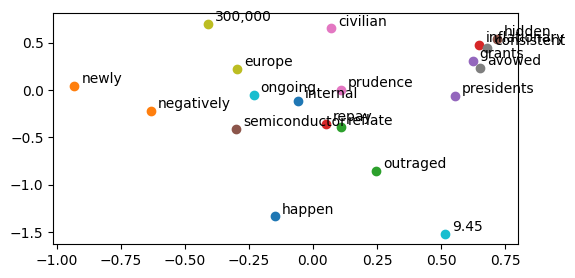

In [30]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): # loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [ ]:
# save the model to be used in web application
torch.save(model.state_dict(), "models/word2vec_skipgram.pth")

## Cosine similarity

In [32]:
tax = get_embed('tax')
money = get_embed('money')
billion = get_embed('billion')
million = get_embed('million')

canada = get_embed('canada')
thai = get_embed('thai')
japan = get_embed('japan')

In [33]:
from numpy import dot
from numpy.linalg import norm


def cos_sim(a, b):
    cos_sim = dot(a, b) / (norm(a) * norm(b))
    return cos_sim

print(f'tax vs money: {cos_sim(tax, money)}')
print(f'tax vs billion: {cos_sim(tax, billion)}')
print(f'tax vs million: {cos_sim(tax, million)}')
print(f'money vs billion: {cos_sim(money, billion)}')
print(f'money vs million: {cos_sim(money, million)}')
print(f'billion vs million: {cos_sim(billion, million)}')

print(f'canada vs thai: {cos_sim(canada, thai)}')
print(f'canada vs japan: {cos_sim(canada, japan)}')
print(f'thai vs japan: {cos_sim(thai, japan)}')

tax vs money: 0.8272712479998989
tax vs billion: 0.5710879581034459
tax vs million: -0.501612934803778
money vs billion: 0.011267055567683046
money vs million: -0.9009810823298141
billion vs million: 0.4236794314803245
canada vs thai: 0.4786014923002084
canada vs japan: 0.7014065213055529
thai vs japan: 0.9615217436275159


In [34]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim


print(f'tax vs money: {cos_sim(tax, money)}')
print(f'tax vs billion: {cos_sim(tax, billion)}')
print(f'tax vs million: {cos_sim(tax, million)}')
print(f'money vs billion: {cos_sim(money, billion)}')
print(f'money vs million: {cos_sim(money, million)}')
print(f'billion vs million: {cos_sim(billion, million)}')

print(f'canada vs thai: {cos_sim(canada, thai)}')
print(f'canada vs japan: {cos_sim(canada, japan)}')
print(f'thai vs japan: {cos_sim(thai, japan)}')

tax vs money: 0.8272712479998989
tax vs billion: 0.5710879581034459
tax vs million: -0.5016129348037781
money vs billion: 0.011267055567683038
money vs million: -0.9009810823298143
billion vs million: 0.4236794314803245
canada vs thai: 0.47860149230020843
canada vs japan: 0.7014065213055529
thai vs japan: 0.9615217436275156
